Installing the project requirements

In [ ]:
!pip install accelerate transformers safetensors opencv-python diffusers controlnet_aux mediapipe
!pip install openai
!pip install carvekit --extra-index-url https://download.pytorch.org/whl/cpu



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.6/274.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6

Connecting to GPT-Vision w/API Key

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="sk-proj-0cD3oLBfTMTsUGnvkwNyT3BlbkFJKC4h3kc1hAwukFVC3JkQ")


In [ ]:
from IPython.display import display, Image

image1_url = "https://ca-times.brightspotcdn.com/dims4/default/99f1c3a/2147483647/strip/true/crop/2000x1405+0+0/resize/1200x843!/format/webp/quality/75/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2Fc9%2Fa9%2F68435d41cf690e0c019e87278361%2F1f764b198a42470189b99b4084be6cf0"

# Display Image
display(Image(url=image1_url))




In [ ]:
import PIL.Image
import requests
from PIL import Image
from io import BytesIO
from carvekit.api.interface import Interface
from carvekit.ml.wrap.fba_matting import FBAMatting
from carvekit.ml.wrap.tracer_b7 import TracerUniversalB7
from carvekit.pipelines.postprocessing import MattingMethod
from carvekit.pipelines.preprocessing import PreprocessingStub
from carvekit.trimap.generator import TrimapGenerator

# Check doc strings for more information
seg_net = TracerUniversalB7(device='cpu',
              batch_size=1)

fba = FBAMatting(device='cpu',
                 input_tensor_size=2048,
                 batch_size=1)

trimap = TrimapGenerator()

preprocessing = PreprocessingStub()

postprocessing = MattingMethod(matting_module=fba,
                               trimap_generator=trimap,
                               device='cpu')

interface = Interface(pre_pipe=preprocessing,
                      post_pipe=postprocessing,
                      seg_pipe=seg_net)

# 图片的URL
url = 'https://i.ibb.co/vQjy8qC/2024-05-21-090635.png'

response = requests.get(url)
response.raise_for_status()  # 检查请求是否成功

image = Image.open(BytesIO(response.content))


cat_wo_bg = interface([image])[0]
cat_wo_bg.save('2.png')


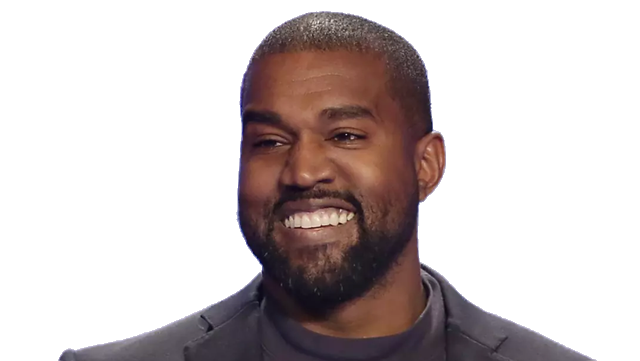

In [ ]:
file_path = '/content/2.png'
image = Image.open(file_path)
display(image)

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="sk-proj-0cD3oLBfTMTsUGnvkwNyT3BlbkFJKC4h3kc1hAwukFVC3JkQ")


In [ ]:
import requests

def upload_image_to_imgbb(image_path, api_key):
    with open(image_path, 'rb') as file:
        response = requests.post(
            'https://api.imgbb.com/1/upload',
            data={'key': api_key},
            files={'image': file}
        )
    return response.json()['data']['url']

api_key = 'c18450c786749500447fe5fc6f072418'
image_path = '/content/2.png'

url = upload_image_to_imgbb(image_path, api_key)
print('Image URL:', url)
from IPython.display import display, Image

image1_url = url

# Display Image
display(Image(url=image1_url))


Image URL: https://i.ibb.co/QvT3Shp/2.png


In [ ]:
def prompt_animal(image_url):
  response = client.chat.completions.create(
    model="gpt-4-turbo",
    messages=[
      {
        "role": "user",
        "content": [
          {"type": "text", "text": "RESPOND IN 1 WORD. Imagine you're an animal sorter aiding in spiritual discovery. Based on the image provided, what animal resonates with the person's essence? Please offer a single-word response. This animal should embody traits or qualities that align with the individual's character or aspirations. Avoid animals with negative connotations. Example responses include dog, cat, tiger, lion, bear, fish, shark, deer. snake YOUR RESPONSE SHOULD BE 1 WORD, RESEMBLING ONE OF THESE ANIMALS"},
          {
            "type": "image_url",
            "image_url": {
              "url": image_url,
            },
          },
        ],
      }
    ],
    max_tokens=300,
  )

  return response.choices[0].message.content

animal = prompt_animal(image1_url)
 # Fill the blank to what animal you want to generate.
print(animal)


Lion


Below is Part 2 of the project that takes in the input

In [ ]:
# 安装 pillow 的兼容版本
!pip install pillow
!pip install typer
!pip install torch
!pip install diffusers
!pip install numpy

try:
    from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
    print("Libraries imported successfully!")
except ImportError as e:
    print(f"Failed to import libraries: {e}")


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade diffusers

from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
from controlnet_aux import OpenposeDetector
from PIL import Image
import torch
import numpy as np
import cv2


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


RuntimeError: Failed to import diffusers.pipelines.controlnet.pipeline_controlnet because of the following error (look up to see its traceback):
Failed to import diffusers.loaders.single_file because of the following error (look up to see its traceback):
Failed to import diffusers.schedulers.scheduling_lms_discrete because of the following error (look up to see its traceback):
module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [ ]:
openpose = OpenposeDetector.from_pretrained('lllyasviel/ControlNet')

controlnet_conditioning_scale = 0.5  # recommended for good generalization

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16
)


In [ ]:
image = load_image(image1_url)
image = openpose(image)

display(image)


In [ ]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16
)


pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)


#pipe.enable_xformers_memory_efficient_attention()

pipe.enable_model_cpu_offload()


In [ ]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [ ]:
nvidia-smi

In [ ]:
import torch
print(torch.cuda.is_available())

In [ ]:
prompt = f'{animal}, ultra realistic, NO HUMAN, Replace BUT NOT ADD OR DELETE the human with a {animal}. Some emotion'
negative_prompt = 'medium quality, unrealastic, distortion, unreasonable lighting, sketches, human'

images = pipe(
    prompt, negative_prompt=negative_prompt, image=image, controlnet_conditioning_scale=controlnet_conditioning_scale, num_inference_steps=30
    ).images

images[0].save(f"hug_lab.png")
